# Cientista de Dados

## 1 - Localização Indoor

Localização indoor é uma solução para localizar pessoas ou objetos dentro de prédios usando ondas de rádio, campo magnético, sinais sonoros ou outra fonte de dados coletada a partir de dispositívos móveis. Um dos métodos utilizados para localização Indoor é o Sistema de Localização por Sinal WiFi. Este método consiste em utilizar *access points* (AP, sensores) para sensoriar o espectro WiFi e coletar o sinal WiFi que dispositivos móveis enviam periodicamente. Assim, para cada sinal enviado por um dispositivo móvel, é coletado o *received signal strength* (RSS), um valor negativo medido em dBm que pode ser visto como a força em que o rádio de um AP sente o sinal enviado por dispositivos móveis em seu raio de alcance.

A tabela abaixo apresenta um exemplo de como o dado coletado é representado:

| SOURCE    | Access Point 1| Access Point 2| Access Point 3| Access Point 4| Access Point 5| Access Point 6 |
| --------- | ------------- | ------------- | ------------- | ------------- | ------------- | -------------  |
|  DEVICE 1 | -51           | -29           | -48           | -46           | -54           | -56            |
|  DEVICE 2 | -67           | -49           | -61           | -62           | -69           | -69            |
|  DEVICE 2 | -61           | -47           | -62           | -60           | -69           | -61            |
|  DEVICE 1 | -52           | -30           | -48           | -44           | -60           | -56            |
|  DEVICE 1 | -52           | -30           | -48           | -44           | -60           | -56            |
|  DEVICE 2 | -60           | -44           | -62           | -56           | -73           | -75            |
|  DEVICE 1 | -40           | -34           | -47           | -43           | -49           | -56            |
|  DEVICE 1 | -40           | -34           | -47           | -43           | -49           | -56            |
|  DEVICE 3 | -60           | -52           | -49           | -60           | -68           | -67            |
|  DEVICE 3 | -61           | -32           | -45           | -42           | -59           | -53            |

Várias abordagens vem sendo propostas para explorar esta representação e assim desenvolver sistemas de localização cada vez mais precisos. Contudo a localização indoor por meio de sinal WiFi ainda é um grande desafio devido ao fato de que o sinal WiFi é ruidoso e de que existem diferenças significativas na força de sinal enviado por cada dispositivo móvel.

Outro desafio é referente a forma de localização. A maioria das abordagens focam em localizar um determinado sinal com base em suas coordenadas (x, y), porém a coleta para este tipo de solução é difícil e consome muito tempo. Outras abordagens geram áreas de coleta de alguns metros quadrados e transformam o problema de localizar em coordenadas (x, y) para localizar em áreas. Esta modelagem tem a vantagem de simplificar a coleta de dados de exemplos.

A solução da IDXP foca na segunda abordagem. Em linhas gerais, a planta da loja é dividida em áreas de calibração levando em consideração fluxo de pessoas, separação entre categorias de produtos e caracterísitcas físicas do espaço. Abaixo é apresentado um exemplo das áreas criadas para uma loja que possui o sistema IDXP.

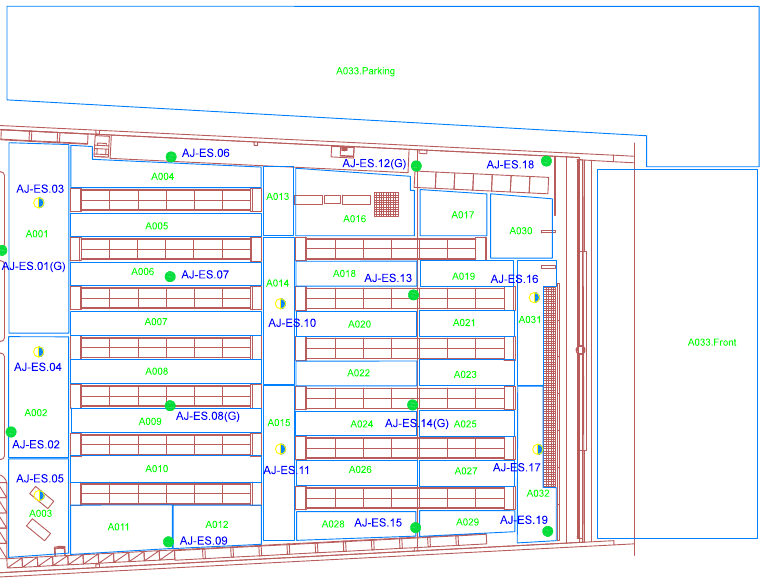

In [1]:
from IPython.display import Image
Image(filename='data/plan.png') 

Na imagem acima, as áreas estão representadas pelos retangulos com linhas azuis e as áreas de A001 a A032 são consideradas áreas dentro da loja e as áreas A033.Front e A033.PArking fora da loja. Os traços vermelhos representam prateleiras ou paredes da loja.

Os pontos verde e branco/azul representam os APs com seus identificadores escritos ao lado. Os APs verde estão equipados com atenas omni convencionais de 2dBi, enquanto os APs branco/azul estão equipados com antenas omni direcionais de 6dBi focadas para baixo. Para fins de simplicidade o nome de cada AP é refenciado nos arquivos de dados apenas como AP**NÚMERO**, por exemplo, o AP AJ-ES-11 é referenciado como AP11. 

Todos os APs estão conectados entre si por meio de uma rede mesh e, a rede mesh por sua vez está conectada à internet por meio dos APs com o indicativo (G) ao lado do nome, que estão conectados ao modem/roteador por meio de cabos ethernet.


## 2 - O Teste

Este teste tem como objetivo avaliar as habilidades do candidato para solucionar problemas utilizando dados. Para tanto, o candidato deverá construir um modelo de localização indoor para a planta mostrada acima, avaliá-lo e escrever um relatório descrevendo todo o processo para construção deste modelo.

Por exemplo, suponha que temos os seguintes dados de teste:

|id |source|AP01|AP02|AP03|AP04|AP05|AP06|AP07|AP08|AP09|AP10|AP11|AP12|AP13|AP14|AP15|AP16|AP17|AP18|AP19|
|--|------|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
|1|"DEVICE 1"|-61.0|-58.0|-89.0|-69.0|-62.0|-52.0|-52.0|-43.0|-54.0|-64|-50.0|-48.0|-70.0|-48.0|-43.0|-58.0|-35.0|-45.0|-30.0|
|2|"DEVICE 2"|-49.0|-47.0|-82.0|-50.0|-50.0|-67.0|-50.0|-52.0|-64.0|-68|-57.0|-63.0|-82.0|-59.0|-61.0|-67.0|-72.0|-71.0|-76.0|
|3|"DEVICE 3"|-53.0|-43.0|-90.0|-57.0|-65.0|-51.0|-44.0|-41.0|-56.0|-56|-46.0|-48.0|-69.0|-49.0|-36.0|-44.0|-46.0|-41.0|-33.0|
 
Para cada instância acima, o modelo deve ser capaz de inferir a área onde cada um destes devices se localizavam:

|id | source   | area|
|---|----------|-----|
|1  |"DEVICE 1"| 32  |
|2  |"DEVICE 2"| 1   |
|3  |"DEVICE 3"| 32  |

### 2.1 - Dados

Serão disponibilizados dois conjuntos de dados rotulados sendo um para a construção do modelo e o outro para a avaliação.

- Treinamento: train.csv
- Validação: test.csv

Ambos os arquivos possuem 21 colunas:
- "source": Identificador do dispositivo móvel;
- "label": Representa a área de onde o sinal foi coletado;
- "AP\*": cada coluna representa um AP e o valor do RSS observado para cada sinal. Observe que para alguns registros podem haver *missing value*, que pode ser causado por falha na leitura ou envio dos dados ou o dispositivo estar fora do raio de alcançe do AP.


| source            | label | AP1 | AP2 | AP3 | AP4 | AP5 | AP6 | AP7 | AP8 | AP9 | AP10 | AP11 | AP12 | AP13 | AP14 | AP15 | AP16 | AP17 | AP18 | AP19 |
|-------------------|-------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|
| DEVICE 3 | A030  | -45        | -57        | -59        | -56        | -55        | -49          | -37        | -48        | -71        | -51        | -62        | -44        | -53        | -29        | -43          | -84        | -34          | -44        | -48        |
| DEVICE 1 | A008  | -59        | -64        | -68        | -63        | -69        | -70          | -75        | -58        | -77        | -65        | -62        | -76        | -57        | -67        | -53          | -85        | -58          | -39        | -63        |
| DEVICE 2 | A002  | -61        | -41        | -62        | -57        | -67        | -70          | -69        | -62        | -79        | -62        | -40        | -70        | -47        | -69        | -49          | -80        | -58          | -45        | -66        |
| DEVICE 2 | A024  | -30        | -57        | -57        | -48        | -42        | -47          | -42        | -40        | -65        | -47        | -53        | -40        | -46        | -47        | -38          | -81        | -38          | -38        | -42        |
| DEVICE 1 | A032  | -64        | -69        | -68        | -67        | -49        | -72          | -61        | -60        | -79        | -66        | -73        | -48        | -61        | -57        | -55          |           NA   | -60          | -52        | -66        | 
| DEVICE 1 | A003  | -58        | -52        | -50        | -61        | -61        | -66          | -72        | -55        |      NA        | -58        | -55        | -69        | -46        | -71        | -51          | -83        | -60          | -53        | -61        |
| DEVICE 3 | A011  | -54        | -54        | -63        | -60        | -71        | -59          | -69        | -51        | -79        | -43        | -60        | -71        | -48        | -64        | -45          | -85        | -57          | -49        | -55        |
| DEVICE 2 | A016  | -51        | -38        | -50        | -42        | -51        | -39          | -49        | -50        | -64        | -52        | -55        | -51        | -54        | -43        | -40          | -80        | -31          | -43        | -46        |
| DEVICE 1 | A023  | -58        | -62        | -76        | -59        | -54        | -65          | -53        | -58        | -80        | -62        | -71        | -56        | -60        | -52        | -50          | -87        | -58          | -57        | -59        |
| DEVICE 3 | A028  | -45        | -51        | -45        | -47        | -43        | -45          | -55        | -40        | -72        | -39        | -50        | -50        | -45        | -52        | -40          | -76        | -45          | -34        | -35        |

### 2.2 - Relatório

O relatório pode ser escrito da forma que o candidato achar mais conveniente, porém é recomendado que seja escrito utilizando o Jupyter.notebook para que todo o processo seja apresentado de forma mais detalhada.

Solicitamos tambéms que compartilhe todo o código gerado para este teste através de sua conta no GitHub.

## 3 - Para onde enviar

Enviar o relatório e o link do repositório contendo todo o código utilizado para o email: jobs-dev@idxpanalytics.com

Em caso de dúvidas sobre este teste entre em contato conosco para que possamos esclarecer suas questões.